In [14]:
%load_ext autoreload
%autoreload 2

from ml.preprocessing import DataPreprocessor
from ml.train_creator import TrainCreator
from ml.click_lgbm import ClickLGBM
from ml.click_catboost import ClickCatBoost

import warnings

import pandas as pd

pd.options.display.max_columns, pd.options.display.max_rows = 5000, 500
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = DataPreprocessor().preprocessing()

In [3]:
data.head()

,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,site_id,tag,domain,site_category,year,month,hour,week_day,click
0,00000000-0000-0001-6268-957597321099,0,7,6,517,Android,SM-N960U,Mobile Phone,dotesports.com,vcontent,com,sport,2021,7,19,Wednesday,False
1,00000000-0000-0001-6268-957946481763,0,7,6,505,Android,Pixel 4a,Mobile Phone,online.seterra.com,vregistration,com,other,2021,7,19,Wednesday,False
2,00000000-0000-0001-6268-958052831367,0,7,6,501,iOS,iPhone,Mobile Phone,hiphopdx.com,vregistration,com,other,2021,7,19,Wednesday,False
3,00000000-0000-0001-6268-958153731939,0,7,6,517,Android,SM-G991U,Mobile Phone,vivaelbirdos.com,vregistration,com,other,2021,7,19,Wednesday,False
4,00000000-0000-0001-6268-959263331420,0,7,6,517,Android,SM-N975U,Mobile Phone,landgrantholyland.com,vregistration,com,other,2021,7,19,Wednesday,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            9583 non-null   object
 1   fc_imp_chk     9583 non-null   int64 
 2   fc_time_chk    9583 non-null   int64 
 3   utmtr          9583 non-null   int64 
 4   mm_dma         9583 non-null   int64 
 5   osName         9583 non-null   object
 6   model          9583 non-null   object
 7   hardware       9583 non-null   object
 8   site_id        9583 non-null   object
 9   tag            9583 non-null   object
 10  domain         9583 non-null   object
 11  site_category  9583 non-null   object
 12  year           9583 non-null   int32 
 13  month          9583 non-null   int32 
 14  hour           9583 non-null   int32 
 15  week_day       9583 non-null   object
 16  click          9583 non-null   bool  
dtypes: bool(1), int32(3), int64(4), object(9)
memory usage: 1.1+ MB


Train

In [5]:
train, validation = TrainCreator().transform()

LGBM

In [6]:
ClickLGBM().cross_val_score() # 4460574544493795

0.44796355529756215

In [7]:
ClickLGBM().save_model()

In [8]:
validation = ClickLGBM().validation()
validation.head()

LogLoss:  0.4541134946861252
Accuracy:  0.800208659363589


,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,domain,site_category,year,month,hour,week_day,click,prediction
0,0,7,0,527,Android,SM-G973U,Mobile Phone,com,other,2021,7,1,Monday,False,0.487
1,0,7,4,518,iOS,iPhone,Mobile Phone,com,other,2021,8,12,Tuesday,False,0.850
2,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,16,Friday,True,0.084
3,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,17,Wednesday,False,0.100
4,0,7,6,505,Android,SM-N975U,Mobile Phone,com,other,2021,7,19,Sunday,True,0.682


In [9]:
# experiments = ClickLGBM().optuna_optimization(100)

In [10]:
# experiments.head()

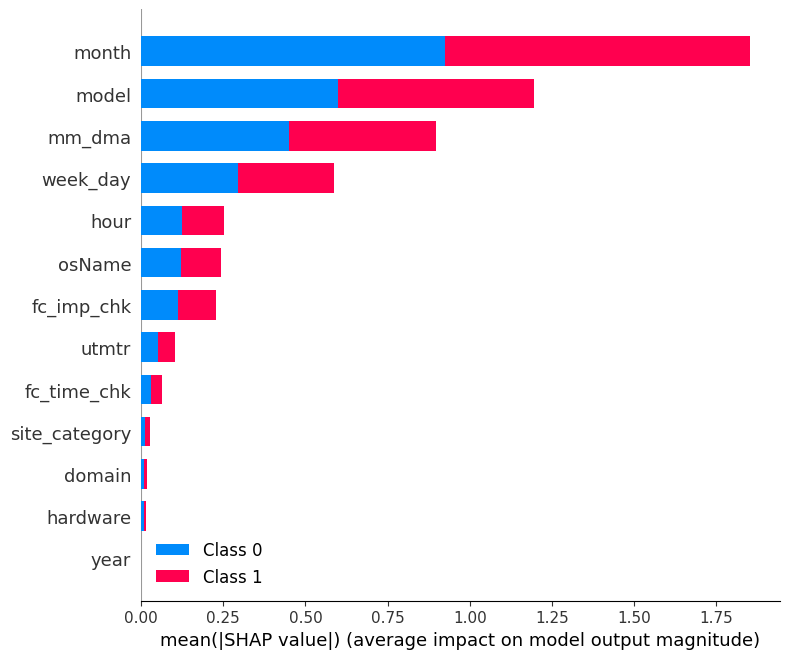

In [9]:
ClickLGBM().feature_importance(is_shap=True)

In [10]:
feature_importance = ClickLGBM().feature_importance(is_shap=False)
feature_importance

,feature,gain
0,mm_dma,22.030
1,hour,20.827
2,model,17.637
3,week_day,14.484
4,utmtr,11.153
5,month,4.802
6,fc_imp_chk,4.756
7,osName,1.686
8,hardware,0.979
9,site_category,0.723


CatBoost

In [48]:
ClickCatBoost().cross_val_score() # 4382027887487491

Training on fold [0/5]

bestTest = 0.4500292503
bestIteration = 403

Training on fold [1/5]

bestTest = 0.4239876666
bestIteration = 546

Training on fold [2/5]

bestTest = 0.4432427007
bestIteration = 333

Training on fold [3/5]

bestTest = 0.4507347504
bestIteration = 524

Training on fold [4/5]

bestTest = 0.4420557064
bestIteration = 488

     iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0             0              0.677             0.003               0.677   
1             1              0.667             0.006               0.666   
2             2              0.654             0.003               0.654   
3             3              0.641             0.006               0.641   
4             4              0.628             0.005               0.628   
..          ...                ...               ...                 ...   
642         642              0.443             0.011               0.342   
643         643              0.443             

0.4431129768615863

In [49]:
ClickCatBoost().save_model()

In [50]:
validation = ClickCatBoost().validation()
validation.head()

LogLoss:  0.445441827679697
Accuracy:  0.803338549817423


,index,uid,fc_imp_chk,fc_time_chk,utmtr,mm_dma,osName,model,hardware,domain,site_category,year,month,hour,week_day,click
0,3264,00000000-0000-0001-6272-613604941017,0,7,0,527,Android,SM-G973U,Mobile Phone,com,other,2021,7,1,Monday,False
1,7498,00000000-0000-0001-6279-945387121616,0,7,4,518,iOS,iPhone,Mobile Phone,com,other,2021,8,12,Tuesday,False
2,5630,00000000-0000-0001-6276-627418591735,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,16,Friday,True
3,4673,00000000-0000-0001-6274-939137071136,0,7,5,539,iOS,iPhone,Mobile Phone,com,other,2021,7,17,Wednesday,False
4,3147,00000000-0000-0001-6272-400916361907,0,7,6,505,Android,SM-N975U,Mobile Phone,com,other,2021,7,19,Sunday,True


In [11]:
# experiments = ClickCatBoost().optuna_optimization(100)

In [12]:
# experiments

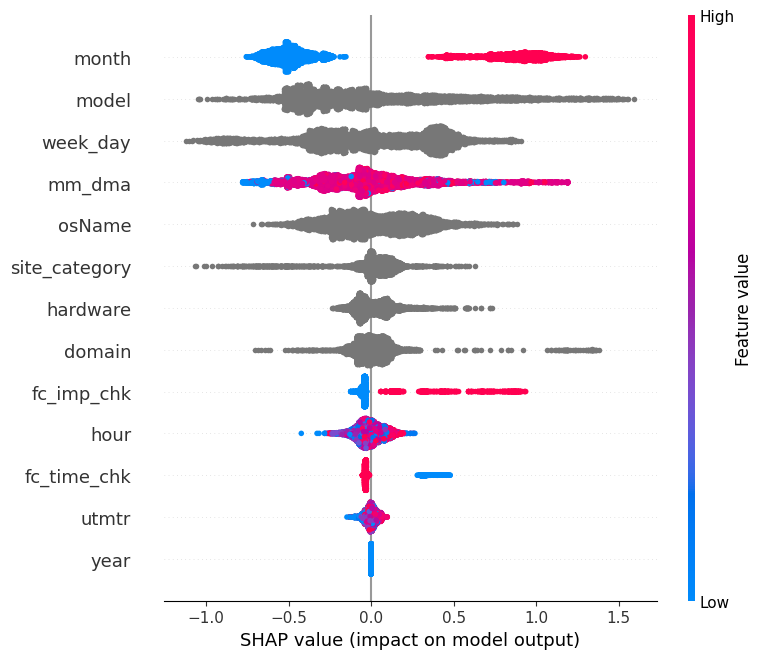

In [15]:
ClickCatBoost().feature_importance()

Other Promts